<a href="https://colab.research.google.com/github/Rx4M00N/IA_Tarea1/blob/main/Modelo_Clasificaci%C3%B3n_CLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación Modelo CLA
Clasificación de muestras de leche según su calidad.

Elaborado por: Joshua Corvera y Ricardo Luna.

MT-8008 Inteligencia Artificial, grupo 1, II Semestre 2022.

## Importación de librerías

In [ ]:
#Importación de liberías
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Carga de datos a partir de archivo .csv

In [ ]:
#Se cargan los datos a partir del archivo .csv
datos_leche = pd.read_csv('milknew.csv', header=0)
#Se buscan y eliminan datos nulos
datos_leche = datos_leche.dropna()
#Imprime los datos cargados
print(datos_leche)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]


##Formato de los datos y separación en subconjuntos

In [ ]:
#Como el grado de la leche presenta valores categóricos, se sustituyen por
#valores numéricos:
#low = 0; medium = 1; high = 2
datos_leche['NGrade']=[
    0 if val == 'low' else 1 if val == 'medium' else 2 for val in datos_leche['Grade']
]
#Se elimina la columna con los valores en texto, a favor de los datos numéricos
datos_leche.drop('Grade',axis=1,inplace=True)

In [ ]:
# =============== Dar formato a los datos de entrenamiento ===============
#Se define un 80% de los datos para realizar el entrenamiento
#Esto deja un 20% de datos para las pruebas
p_train = 0.80
#Se seleccionan datos al azar, mediante la asignación temporal de flags
datos_leche['is_train'] = np.random.uniform(0, 1, len(datos_leche)) <= p_train
#Se usan los flags para separar los datos en conjuntos de train y test
train, test = datos_leche[datos_leche['is_train']==True], datos_leche[datos_leche['is_train']==False]
#Se eliminan los flags usados
datos_leche = datos_leche.drop('is_train', 1)
#Se imprimen las cantidades de datos de entrenamiento y de prueba
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))
#Se eliminan los flags temporales de los conjuntos de prueba y entrenamiento
train.pop('is_train')
test.pop('is_train')
#En los conjuntos anteriores, se separan las categorías de los datos de entrada
train_labels = train.pop('NGrade')
train_data = train
test_labels = test.pop('NGrade')
test_data = test

Ejemplos usados para entrenar:  843
Ejemplos usados para test:  216


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


##Normalización de datos

In [ ]:
# =============== Ajustar el valor de los datos ===============
#Para que los datos sean interpretados de forma correcta por cada neurona, se
#utiliza un escalador, que se encarga de normalizarlos en cada subconjunto
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

##Creación del modelo

In [ ]:
# ================ Creación del modelo ================
#Se define el modelo de la red, con sus capas de entrada, ocultas y salidas
#El modelo se compone de la siguiente forma:
#7 entradas
#1 capa oculta (con varias neuronas, cantidad sujeta a cambios)
#3 neuronas para las clasificaciones a la salida
model = keras.Sequential([keras.layers.Flatten(input_shape=(7,)),
                          keras.layers.Dense(16, activation='sigmoid'),
                          keras.layers.Dense(3, activation='softmax')])

##Definición de optimizador

In [ ]:
# ================ Optimizador ================
#Se realizan pruebas con dos optimizadores: SGD y Adam
#Dentro del objeto optimizador es posible definir la tasa de aprendizaje y
#el momento por utilizar (para ADAM el valor del momento se denota beta_1)

#optimizador = keras.optimizers.SGD(learning_rate=0.1, momentum=0.8)
optimizador = keras.optimizers.Adam(learning_rate=0.1,beta_1=0.4)

##Compilación del modelo

In [ ]:
#Se compila el modelo, con el optimizador seleccionado
#Además se define la función de pérdida como aquella para trabajar en
#clasificación, y se establece que se medirá la precisión de los datos
model.compile(optimizer=optimizador, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Entrenamiento

In [ ]:
# ================ Entrenamiento ================
#Se define la cantidad de iteraciones para el entrenamiento de la red
iteration = 1000
#Asimismo, se calcula la cantidad y frecuencia de las validaciones, según las
#iteraciones realizadas
CantVal = int(iteration * 0.1)
freqVal = int(iteration / CantVal)
#Luego, se inicia el entrenamiento de la red, lo cual se indica en pantalla
print("Realizando entrenamiento...")
#Al usar model.fit, primero se ingresan los datos de entrenamiento, y sus
#respectivas clasificaciones
#Después se establece el número de iteraciones (epochs), el porcentaje de datos
#usado para validación (20%) y la frecuencia calculada para cada validación
#Por último, si se establece "verbose" como 1 se pueden observar los valores de
#pérdida y precisión por cada iteración. Para suprimir esta salida de texto, se
#establece "verbose=0"
training = model.fit(train_data, train_labels.to_numpy(), epochs=iteration,
                     validation_split=0.2,
                     validation_freq=freqVal, verbose=0)
#Se indica el final del entrenamiento
print("Fin del entrenamiento")

Realizando entrenamiento...
Fin del entrenamiento


##Gráficas de pérdida y precisión

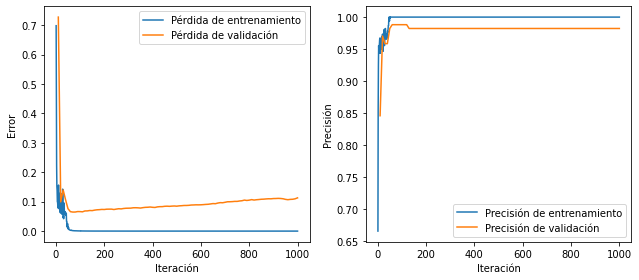

In [ ]:
# ================ Gráficas de pérdida y precisión ================
#Luego del entrenamiento, se obtienen los datos de pérdida para el entrenamiento
#y la validación, así como los datos de precisión
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']
#Se crean arrays para definir los ejes horizontales de las pérdidas anteriores
#en la gráfica
x_loss = []
x_acc = []
x_val = []
x_valacc = []
#Se agregan los valores a cada eje x del entrenamiento, que corresponden a cada
#iteración
for i in range(iteration):
  x_loss.append(i + 1)
  x_acc.append(i + 1)
#Se agregan los valores a cada eje x de validación, de acuerdo con la frecuencia 
#de validación definida anteriormente
for i in range(CantVal):
  x_val.append((i + 1) * freqVal)
  x_valacc.append((i + 1) * freqVal)
#Para graficar de mejor forma los resultados, se usa un subplot con 2 espacios
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
#Se configuran los nombres de cada eje en las gráficas
axs[0].set_xlabel("Iteración")
axs[0].set_ylabel("Error")
axs[1].set_xlabel("Iteración")
axs[1].set_ylabel("Precisión")
#Se grafican los datos de pérdida para el entrenamiento y la validación
axs[0].plot(x_loss, loss, label="Pérdida de entrenamiento")
axs[0].plot(x_val, val_loss, label="Pérdida de validación")
#Se grafican los datos de precisión para el entrenamiento y la validación
axs[1].plot(x_acc, acc, label="Precisión de entrenamiento")
axs[1].plot(x_valacc, val_acc, label="Precisión de validación")
#Muestra las leyendas para identificar las curvas
axs[0].legend()
axs[1].legend()
#Despliega las gráficas resultantes
fig.tight_layout()
plt.show()

##Evaluación de pruebas (matriz de confusión)

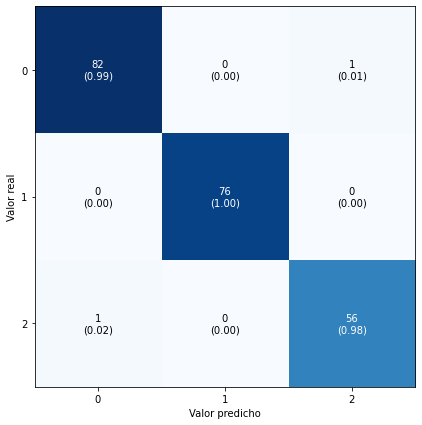

In [ ]:
# ================ Matriz de confusión ================
#Se realizan las predicciones de los datos de prueba, calculando probabilidades
#de que cada dato de entrada corresponda a una clasificación determinada
prob_matrix = model.predict(test_data)
#Se obtiene el índice con la mayor probabilidad luego de las predicciones
pred_labels = np.argmax(prob_matrix, axis=-1)
#Se crea la matriz de confusión al comparar el array anterior con test_labels
mat = confusion_matrix(pred_labels, test_labels)
#Se imprime la matriz de confusión obtenida
plot_confusion_matrix(conf_mat=mat, 
                      figsize=(7, 7), 
                      show_normed=True,
                      cmap=plt.cm.Blues)
#Define los nombres de los ejes
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
#Muestra la matriz en pantalla
plt.show()

##Reporte de clasificación

In [ ]:
#Para visualizar mejor la precisión de la red y otras métricas, se usa un
#reporte de clasificación
from sklearn.metrics import classification_report

print('\nClassification Report\n')
print(classification_report(test_labels, pred_labels, target_names=['low', 'medium', 'high']))


Classification Report

              precision    recall  f1-score   support

         low       0.99      0.99      0.99        83
      medium       1.00      1.00      1.00        76
        high       0.98      0.98      0.98        57

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



##Carga de combinaciones adicionales de entrada

In [ ]:
# ================ Carga de datos externos ================
#Primero se cargan los datos a partir de un nuevo archivo .csv
data_milk = pd.read_csv('milknew1.csv', header=0)
print(data_milk)
#Como estos datos solo incluyen los parámetros de entrada, se procede a su
#normalización
data_milk = scaler.fit_transform(data_milk)
#Luego, se clasifican los datos
prob_matrix_1 = model.predict(data_milk)
pred_labels_1 = np.argmax(prob_matrix_1, axis=-1)
print("Grades:",pred_labels_1)

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  7.5          68      1     0     1          1     238
1  5.1          22      1     1     1          1     208
2  8.2          81      0     0     1          1     257
Grades: [0 1 0]


##Estudio de sensibilidad para los valores de entrada

In [ ]:
#Para observar la sensibilidad de cada variable en el resultado final,
#se carga de nuevo el csv original, y posteriormente se
#variarán los valores de cada dato de la siguiente forma:
#valor continuo (pH, temperatura, color): +- 20%, +- 40%
#valor discreto (sabor, olor, grasa, turbidez): alternar entre 0 y 1
cet_par = pd.read_csv('milknew.csv', header=0)
#Se vuelve a cambiar las clasificaciones a valores numéricos
cet_par['NGrade']=[
    0 if val == 'low' else 1 if val == 'medium' else 2 for val in cet_par['Grade']
]
cet_par.drop('Grade',axis=1,inplace=True)
print(cet_par)
#Se separan las clasificaciones del nuevo archivo
cp_labels = cet_par.pop('NGrade')
cp_data = cet_par

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  NGrade
0     6.6          35      1     0     1          0     254       2
1     6.6          36      0     1     0          1     253       2
2     8.5          70      1     1     1          1     246       0
3     9.5          34      1     1     0          1     255       0
4     6.6          37      0     0     0          0     255       1
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247       1
1055  6.7          38      1     0     1          0     255       2
1056  3.0          40      1     1     1          1     255       0
1057  6.8          43      1     0     1          0     250       2
1058  8.6          55      0     1     1          1     255       0

[1059 rows x 8 columns]


In [ ]:
#En este bloque, se realiza la variación deseada a cada parámetro, y luego
#se normalizan los datos para poder hacer las predicciones
cp_data['Colour'] -= 0.4*(cp_data['Colour'])
#cp_data['Colour'] = 255
#cp_data['Turbidity'] = 0
cp_data = scaler.fit_transform(cp_data)

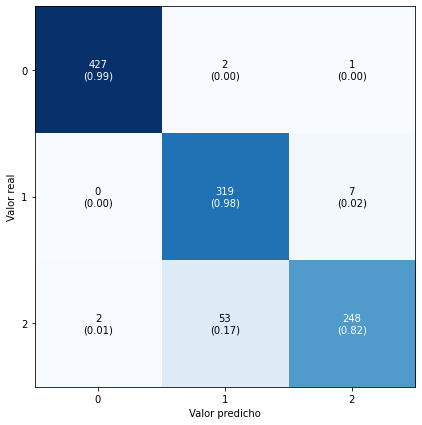

In [ ]:
#Nuevamente, se realizan predicciones, y se crea una matriz de confusión para
#ver los resultados de la red
prob_matrix_cp = model.predict(cp_data)
pred_labels_cp = np.argmax(prob_matrix_cp, axis=-1)
mat_cp = confusion_matrix(pred_labels_cp, cp_labels)
plot_confusion_matrix(conf_mat=mat_cp, 
                      figsize=(7, 7), 
                      show_normed=True,
                      cmap=plt.cm.Blues)
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()